# <span style="color:darkblue"> QTM 151 - Final Project </span>

<font size="5"> 

Group Number

In [1]:
print("Eric Zou", "Harris Wang", "Zhenan An", "William Xu")

Eric Zou Harris Wang Zhenan An William Xu


<font size="5"> 

Set Up

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from   matplotlib import style
from   matplotlib import ticker
import matplotlib.dates as mdates
import numpy as np

circuits = pd.read_csv("data_raw/circuits.csv")
constructor_result = pd.read_csv("data_raw/constructor_results.csv")
constructor_standing = pd.read_csv("data_raw/constructor_standings.csv")
constructor = pd.read_csv("data_raw/constructors.csv")
drivers = pd.read_csv("data_raw/drivers.csv")
driver_standing = pd.read_csv("data_raw/driver_standings.csv")
results = pd.read_csv("data_raw/results.csv")
qualifying = pd.read_csv("data_raw/qualifying.csv")
lap_time = pd.read_csv("data_raw/lap_times.csv")
pit_stops = pd.read_csv("data_raw/pit_stops.csv")
seasons = pd.read_csv("data_raw/seasons.csv")
races = pd.read_csv("data_raw/races.csv")
status = pd.read_csv("data_raw/status.csv")
sprint_result = pd.read_csv("data_raw/sprint_results.csv")


<font size="7"> 

Question 1: which team is the overall best on the average rank.

<font size="3"> 

constructor_merge is the merge data set for constructor dataset and result dataset for "constructuorId" and "rank column. We merge on "constructorId" and method is left.

In [ ]:
constructor_merge = pd.merge(constructor,
                        results[["constructorId", "rank"]],
                        on="constructorId",
                        how="left")

<font size = "3">

Data cleaning for the constructor_merge dataset "rank" column. There exist string value "\N" and we convert it into "NaN".

In [ ]:
constructor_merge["rank"] = pd.to_numeric(constructor_merge["rank"], errors = "coerce")
subset = constructor_merge[constructor_merge["rank"].isna()]
list_unique = subset["rank"].unique()
print(list_unique)

list_old = ["\\N"]
list_new = [np.nan]
constructor_merge["rank"] = constructor_merge["rank"].replace(list_old, list_new)

<font size = "3">

Print the mean_rank for the each team. We first groupby by "constructorRef", and we use agg. function to calculate the mean rank of each team. Then, we sort the mean value by ascending. 

In [26]:
print(constructor_merge.groupby("constructorRef")
                        .agg(mean_rank = ("rank", "mean"))
                        .sort_values("mean_rank", ascending = True))

                mean_rank
constructorRef           
mercedes         5.286267
brawn            5.424242
ferrari          5.688615
red_bull         6.709251
bar              7.985075
...                   ...
vhristensen           NaN
watson                NaN
wetteroth             NaN
wolf                  NaN
zakspeed              NaN

[211 rows x 1 columns]


We find out the top five team with the smallest mean value by using nsmallest function. Then we plot them into the bar plot. The x-axis is team, and y-axis is the mean value of rank.

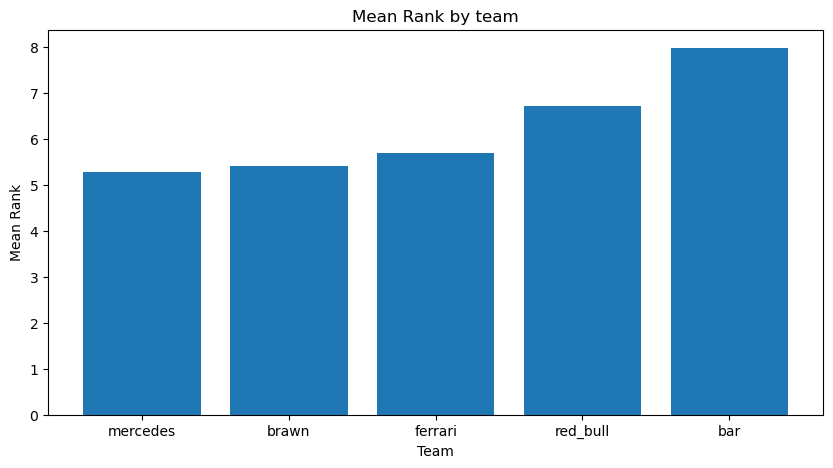

In [27]:
team_mean_rank = constructor_merge.groupby("constructorRef")["rank"].mean().sort_values(ascending=True)
top_5_team = team_mean_rank.nsmallest(5)

plt.figure(figsize=(10, 5))
plt.bar(top_5_team.index, top_5_team.values)

plt.title("Mean Rank by team")
plt.xlabel("Team")
plt.ylabel("Mean Rank")

plt.show()

<font size="7"> 

Question 2: check the differnce between rank and position for the top 11 teams. 

<font size = "3">

We use the list_unique1 to find the unique team in the constructor_merge datastset. Then we choose the top 11 popular team in the 2014 F1 season. Then, we use query function to find out these team in the constructor_merge dataset. We store the value to constructor_team dataset.

In [ ]:
list_unique1 = constructor_merge["constructorRef"].unique()
list_team = ["mercedes", "red_bull", 'mclaren', 'lotus', 'ferrari', 'force_india', 'sauber', 'toro_rosso', 'williams','marussia','caterham']

constructor_team = constructor_merge.query("constructorRef in @list_team")

<font size = "3">

We merge the constructor_team dataset with results dataset for the "constructorId", "position", "rank", "driverId". We want to check the difference betweeen position and rank later. We merge on "constructorId" and by "left" method.

In [ ]:
team_merge = pd.merge(constructor_team,
                      results[["constructorId", "position", "rank", "driverId"]],
                      on="constructorId",
                      how="left")

<font size = "3">

Data cleaning process. We change the str value "\N" to "NA" for both "position" and "rank" column in team_merge dataset. Then we drop the value with "NA". Finally, we change the "position" and "rank" column into numeric column in order for later computation. 

In [ ]:
list_old = ["\\N"]
list_new = [pd.NA]
team_merge["position"] = team_merge["position"].replace(list_old, list_new)
team_merge["rank_y"] = team_merge["rank_y"].replace(list_old, list_new)

team_merge.dropna(subset=["position", "rank_y"], inplace=True)

team_merge["position"] = pd.to_numeric(team_merge["position"])
team_merge["rank_y"] = pd.to_numeric(team_merge["rank_y"])

<font size = "3">

The computation process: we first group by each "constructorRef". Then, we use agg funcction to calculate the mean for both "position" and "rank" column. Then, we use lambda function to calculate the difference between the mean of rank and mean of position. Due to the left merge, the rank name chnaged to "rank_y". 

In [ ]:
team_diff = team_merge.groupby("constructorRef").agg({"rank_y": "mean", "position": "mean"}).apply(lambda x: x["rank_y"] - x["position"], axis=1)
team_diff_sorted = team_diff.sort_values(ascending=False)


<font size = "3">

We plot the data we get to the plot. We use (kind = 'brah') to get a horizton graph in order to have a bettwe visualization. 

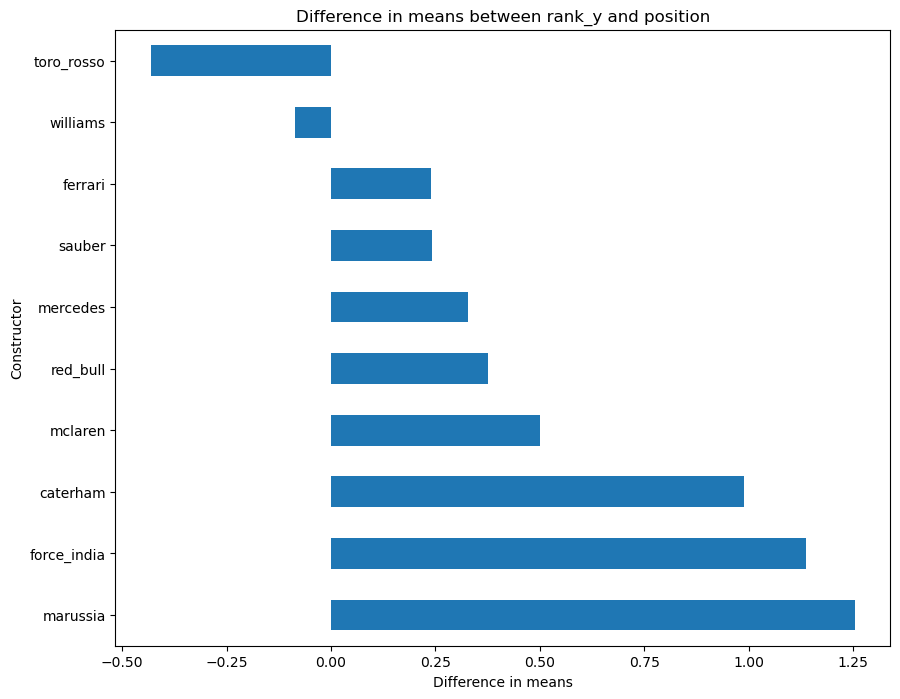

In [29]:

fig, ax = plt.subplots(figsize=(10, 8))
team_diff_sorted.plot(kind='barh', ax=ax)

ax.set_xlabel('Difference in means')
ax.set_ylabel('Constructor')
ax.set_title('Difference in means between rank_y and position')

plt.show()

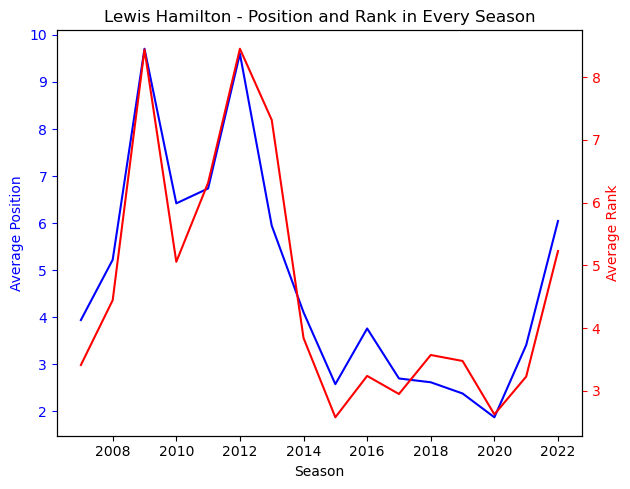

In [24]:
driver_id = 1

driver_data = pd.merge(results, races, on='raceId')
driver_data = pd.merge(driver_data, seasons, on='year')

driver_data = driver_data[driver_data['driverId'] == driver_id]
driver_data['rank'] = pd.to_numeric(driver_data['rank'], errors='coerce')

driver_season_data = driver_data.groupby('year').agg({'positionOrder': 'mean', 'rank': 'mean'}).reset_index()

fig, ax1 = plt.subplots()

ax1.plot(driver_season_data['year'], driver_season_data['positionOrder'], 'b-', label='Position')
ax1.set_xlabel('Season')
ax1.set_ylabel('Average Position', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(driver_season_data['year'], driver_season_data['rank'], 'r-', label='Rank')
ax2.set_ylabel('Average Rank', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Lewis Hamilton - Position and Rank in Every Season')
plt.show()


In [23]:
merged=pd.merge(pit_stops,results,on=["driverId","raceId"])

merged2=pd.merge(merged,
                 constructor,
                 on="constructorId")

merged2["duration_numeric"]=pd.to_numeric(merged2["duration"],errors="coerce")
display(merged2)

stop_time=(merged2.groupby(["constructorId","raceId"])
    .agg(total_stop = ("duration_numeric","sum")))

average_stop=(stop_time.groupby("constructorId")
    .agg(average_stop = ("total_stop","mean")))


merged3=pd.merge(average_stop,constructor,on="constructorId")

merged3

,raceId,driverId,stop,lap,time_x,duration,milliseconds_x,resultId,constructorId,number,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,name,nationality,url,duration_numeric
0,841,153,1,1,17:05:23,26.898,26898,20789,5,19,...,41,10,1:30.467,211.025,11,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,26.898
1,841,153,2,17,17:31:06,24.463,24463,20789,5,19,...,41,10,1:30.467,211.025,11,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,24.463
2,841,153,3,35,17:59:45,26.348,26348,20789,5,19,...,41,10,1:30.467,211.025,11,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,26.348
3,841,67,1,15,17:27:34,25.342,25342,20786,5,18,...,44,11,1:30.836,210.167,11,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,25.342
4,841,67,2,29,17:49:47,23.100,23100,20786,5,18,...,44,11,1:30.836,210.167,11,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,23.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9629,1095,840,1,29,15:44:14,23.469,23469,25815,117,18,...,50,8,1:14.831,207.299,1,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,23.469
9630,1095,840,2,48,16:08:59,23.764,23764,25815,117,18,...,50,8,1:14.831,207.299,1,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,23.764
9631,1096,840,1,13,17:23:19,21.814,21814,25833,117,18,...,42,9,1:29.620,212.135,1,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,21.814
9632,1096,840,2,40,18:04:44,21.802,21802,25833,117,18,...,42,9,1:29.620,212.135,1,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,21.802


,constructorId,average_stop,constructorRef,name,nationality,url
0,1,88.633289,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,3,94.970443,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
2,4,79.629353,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
3,5,92.323056,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
4,6,89.246319,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
5,9,89.816356,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
6,10,90.870115,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...
7,15,96.108753,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber
8,51,80.265605,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...
9,117,81.419953,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...
